In [6]:
# Ce code "TP_CNN_TSP"est basé sur tensorflow et keras pour construire un modele CNN
# Ce code est basé sur le tutorial de CNN-tensorflow https://www.tensorflow.org/tutorials/images/cnn
#Pour lier google Colab avec google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# Pour importer les outils
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot
import h5py
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
tf.random.set_seed(13)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [8]:
# Pour telécharger la database
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

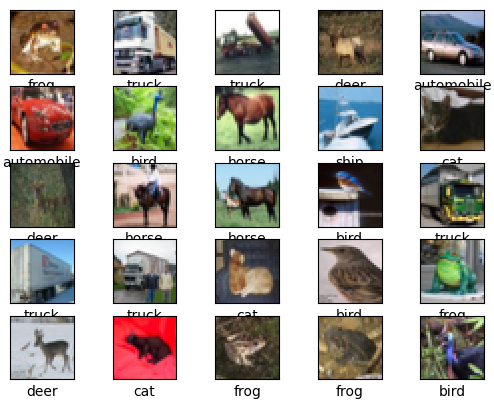

In [9]:
#Pour afficher 25 images de l'ensemble d'apprentissage
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout layer for regularization

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout layer for regularization

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout layer for regularization

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout layer for regularization

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout layer for regularization


# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer for regularization

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer for regularization

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set learning rate here
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [11]:
#Pour afficher l'architecture du modele CNN
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [12]:
#Pour compilation et entrainement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))
model.save("/content/drive/My Drive/Colab Notebooks/my_model_10.h5")

Epoch 1/50
1563/1563 [==============================] - 37s 15ms/step - loss: 1.9035 - accuracy: 0.3402 - val_loss: 1.8370 - val_accuracy: 0.4104
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2651 - accuracy: 0.5530 - val_loss: 1.2111 - val_accuracy: 0.5893
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0399 - accuracy: 0.6432 - val_loss: 0.8707 - val_accuracy: 0.7004
Epoch 4/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9088 - accuracy: 0.6952 - val_loss: 1.0382 - val_accuracy: 0.6562
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8029 - accuracy: 0.7349 - val_loss: 0.8021 - val_accuracy: 0.7338
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7262 - accuracy: 0.7617 - val_loss: 0.7440 - val_accuracy: 0.7572
Epoch 7/50
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6610 - accuracy: 0.7834 - val_loss: 0.6152 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
#model=load_model("/content/drive/My Drive/Colab Notebooks/my_model_5.h5")

313/313 - 1s - loss: 0.5426 - accuracy: 0.8594 - 1s/epoch - 3ms/step


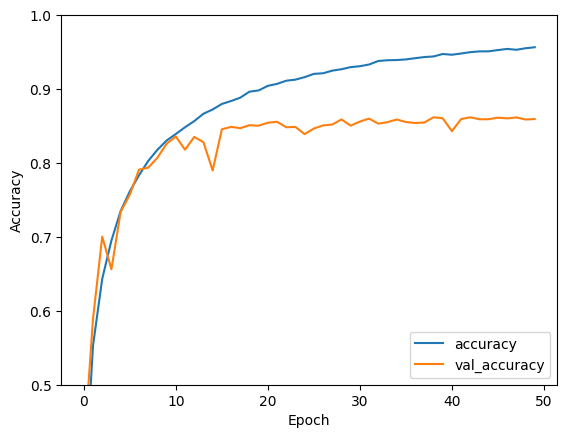

In [14]:
# Pour tracer la courbe accuracy en foctions de nombre des epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [15]:
print(test_acc)

0.8593999743461609


In [16]:
#pour importer l'image chien.jpg
img = cv2.imread("/content/drive/My Drive/chien.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
#Pour la prédiction de l'image chien
img = cv2.resize(img_cvt, (32,32))
img = img.astype('float32')
img= img / 255.0
imgs = tf.expand_dims(
    img,
    axis=0,
    name=None
)
model.predict(imgs)

In [ ]:
i=7
#pour visualiser la couche i
model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)
model2.summary()
feature_maps = model2.predict(imgs)
square = 5
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

In [ ]:
from tabulate import tabulate

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a list to store table data
table_data = []

# Evaluate the model for each class separately
for class_name, class_label in zip(class_names, range(10)):
    # Filter test images and labels corresponding to the current class
    class_test_images = test_images[test_labels[:, 0] == class_label]
    class_test_labels = test_labels[test_labels[:, 0] == class_label]

    # Count the number of images for the current class
    num_images = len(class_test_images)

    # Evaluate the model on the class-specific test set
    test_loss, test_acc = model.evaluate(class_test_images, class_test_labels, verbose=0)

    # Append class results to table data
    table_data.append([class_name, test_acc, num_images])

# Print the table
print(tabulate(table_data, headers=['Class', 'Accuracy', 'Number of Images']))